In [1]:
from shapely.geometry import shape
import geopandas as gpd
import pandas as pd

# 讀取 JSON 文件
data = pd.read_json('../data/tw_district.json')

# 提取 features 欄位中的地理資訊和屬性
features = data['features']
properties = features.apply(lambda x: x['properties'])
geometries = features.apply(lambda x: shape(x['geometry']))

# 將屬性和幾何資料轉換為 GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

gdf

,features,geometry
0,"{'名稱': '金門縣金城鎮', '行政區域代碼': 902001, '比例尺分母': 5000}","MULTIPOLYGON (((118.33938 24.39052, 118.33942 ..."
1,"{'名稱': '金門縣金沙鎮', '行政區域代碼': 902002, '比例尺分母': 5000}","MULTIPOLYGON (((118.43906 24.52474, 118.43904 ..."
2,"{'名稱': '金門縣金湖鎮', '行政區域代碼': 902003, '比例尺分母': 5000}","MULTIPOLYGON (((118.43821 24.4071, 118.4382 24..."
3,"{'名稱': '金門縣金寧鄉', '行政區域代碼': 902004, '比例尺分母': 5000}","MULTIPOLYGON (((118.36582 24.47375, 118.36584 ..."
4,"{'名稱': '金門縣烏坵鄉', '行政區域代碼': 902006, '比例尺分母': 5000}","MULTIPOLYGON (((119.47405 24.98598, 119.47429 ..."
...,...,...
363,"{'名稱': '桃園市桃園區', '行政區域代碼': 6800100, '比例尺分母': 5...","MULTIPOLYGON (((121.30171 25.03317, 121.3018 2..."
364,"{'名稱': '桃園市八德區', '行政區域代碼': 6800800, '比例尺分母': 5...","MULTIPOLYGON (((121.25763 24.92924, 121.2577 2..."
365,"{'名稱': '桃園市大溪區', '行政區域代碼': 6800300, '比例尺分母': 5...","MULTIPOLYGON (((121.29274 24.92448, 121.29291 ..."
366,"{'名稱': '宜蘭縣五結鄉', '行政區域代碼': 1000209, '比例尺分母': 5...","MULTIPOLYGON (((121.74752 24.71848, 121.74763 ..."


In [2]:
# 假設 gdf 是包含所有地理要素的 GeoDataFrame
# 提取 'features' 中的 '名稱' 欄位
gdf['名稱'] = gdf['features'].apply(lambda x: x['名稱'])

# 定義六都名稱
six_metros = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']

# 使用 str.contains 篩選六都的資料
six_metros_gdf = gdf[gdf['名稱'].str.contains('|'.join(six_metros))]

# 查看篩選結果
six_metros_gdf


,features,geometry,名稱
35,"{'名稱': '新北市永和區', '行政區域代碼': 6500400, '比例尺分母': 5...","MULTIPOLYGON (((121.51239 25.02175, 121.51255 ...",新北市永和區
36,"{'名稱': '新北市新店區', '行政區域代碼': 6500600, '比例尺分母': 5...","MULTIPOLYGON (((121.60922 24.96402, 121.60929 ...",新北市新店區
37,"{'名稱': '新北市土城區', '行政區域代碼': 6501300, '比例尺分母': 5...","MULTIPOLYGON (((121.46714 24.99298, 121.46716 ...",新北市土城區
38,"{'名稱': '新北市蘆洲區', '行政區域代碼': 6501400, '比例尺分母': 5...","MULTIPOLYGON (((121.49114 25.09477, 121.49025 ...",新北市蘆洲區
39,"{'名稱': '新北市五股區', '行政區域代碼': 6501500, '比例尺分母': 5...","MULTIPOLYGON (((121.45902 25.11272, 121.45902 ...",新北市五股區
...,...,...,...
361,"{'名稱': '桃園市中壢區', '行政區域代碼': 6800200, '比例尺分母': 5...","MULTIPOLYGON (((121.18542 25.02254, 121.18542 ...",桃園市中壢區
362,"{'名稱': '桃園市平鎮區', '行政區域代碼': 6801000, '比例尺分母': 5...","MULTIPOLYGON (((121.22256 24.94984, 121.22259 ...",桃園市平鎮區
363,"{'名稱': '桃園市桃園區', '行政區域代碼': 6800100, '比例尺分母': 5...","MULTIPOLYGON (((121.30171 25.03317, 121.3018 2...",桃園市桃園區
364,"{'名稱': '桃園市八德區', '行政區域代碼': 6800800, '比例尺分母': 5...","MULTIPOLYGON (((121.25763 24.92924, 121.2577 2...",桃園市八德區


In [3]:
import matplotlib.pyplot as plt

# 讀取人口密度資料
df_population = pd.read_csv("../data/popularity_district_109.csv")

# 將代碼轉為字符串後，提取前5位和最後2位組成新代碼
df_population['區域代碼'] = df_population['鄉鎮市區代碼'].astype(str).apply(lambda x: x[:3] + x[-3:] + "0")

# 使用新生成的代碼進行合併
six_metros_gdf['行政區域代碼'] = six_metros_gdf['features'].apply(lambda x: x['行政區域代碼']).astype(str)
six_metros_gdf = six_metros_gdf.merge(df_population, left_on='行政區域代碼', right_on='區域代碼', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_district_109.geojson'
six_metros_gdf.to_file(output_geojson, driver='GeoJSON')

d:\Anaconda\envs\intern\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [28]:
six_metros_gdf

,features,geometry,名稱,行政區域代碼,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間,區域代碼
0,"{'名稱': '新北市永和區', '行政區域代碼': 6500400, '比例尺分母': 5...","MULTIPOLYGON (((121.51239 25.02175, 121.51255 ...",新北市永和區,6500400,65000,新北市,65000040,永和區,89.98,2.41,38555.95,44.73,17.04,27.69,162.45,109Y06M,6500400
1,"{'名稱': '新北市新店區', '行政區域代碼': 6500600, '比例尺分母': 5...","MULTIPOLYGON (((121.60922 24.96402, 121.60929 ...",新北市新店區,6500600,65000,新北市,65000060,新店區,92.07,2.34,2524.49,39.09,13.15,25.94,197.24,109Y06M,6500600
2,"{'名稱': '新北市土城區', '行政區域代碼': 6501300, '比例尺分母': 5...","MULTIPOLYGON (((121.46714 24.99298, 121.46716 ...",新北市土城區,6501300,65000,新北市,65000130,土城區,96.86,2.68,8054.90,31.93,15.86,16.07,101.34,109Y06M,6501300
3,"{'名稱': '新北市蘆洲區', '行政區域代碼': 6501400, '比例尺分母': 5...","MULTIPOLYGON (((121.49114 25.09477, 121.49025 ...",新北市蘆洲區,6501400,65000,新北市,65000140,蘆洲區,96.02,2.77,27205.96,31.79,17.01,14.78,86.88,109Y06M,6501400
4,"{'名稱': '新北市五股區', '行政區域代碼': 6501500, '比例尺分母': 5...","MULTIPOLYGON (((121.45902 25.11272, 121.45902 ...",新北市五股區,6501500,65000,新北市,65000150,五股區,101.40,2.61,2549.68,31.34,15.91,15.44,97.06,109Y06M,6501500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,"{'名稱': '桃園市中壢區', '行政區域代碼': 6800200, '比例尺分母': 5...","MULTIPOLYGON (((121.18542 25.02254, 121.18542 ...",桃園市中壢區,6800200,68000,桃園市,68000020,中壢區,96.31,2.65,5482.21,38.03,20.62,17.42,84.48,109Y06M,6800200
154,"{'名稱': '桃園市平鎮區', '行政區域代碼': 6801000, '比例尺分母': 5...","MULTIPOLYGON (((121.22256 24.94984, 121.22259 ...",桃園市平鎮區,6801000,68000,桃園市,68000100,平鎮區,98.11,2.84,4787.62,37.05,20.46,16.59,81.10,109Y06M,6801000
155,"{'名稱': '桃園市桃園區', '行政區域代碼': 6800100, '比例尺分母': 5...","MULTIPOLYGON (((121.30171 25.03317, 121.3018 2...",桃園市桃園區,6800100,68000,桃園市,68000010,桃園區,93.74,2.60,13065.00,37.78,20.93,16.85,80.48,109Y06M,6800100
156,"{'名稱': '桃園市八德區', '行政區域代碼': 6800800, '比例尺分母': 5...","MULTIPOLYGON (((121.25763 24.92924, 121.2577 2...",桃園市八德區,6800800,68000,桃園市,68000080,八德區,99.07,2.76,6156.19,37.04,20.08,16.96,84.47,109Y06M,6800800


In [4]:
gdf['名稱'] = gdf['features'].apply(lambda x: x['名稱']);

# 根據不同情況處理區域代碼
def format_code(code):
    code_str = str(code)
    if code_str.startswith('1') or code_str.startswith('9'):
        # 如果代碼為1開頭，在最後加個0
        return code_str + '0'
    elif code_str.startswith('6'):
        return code_str[:3] + '00' + code_str[-4:-1]
    else:
        # 其他情況下，取前3位和最後3位組成新代碼，並加個0
        return code_str[:3] + code_str[-3:] + '0'

# 應用上述規則生成新的 gdf 的行政區域代碼
gdf['區域代碼'] = gdf['features'].apply(lambda x: format_code(x['行政區域代碼']))
df_population['鄉鎮市區代碼'] = df_population['鄉鎮市區代碼'].astype(str)

# 使用新生成的代碼進行合併
gdf = gdf.merge(df_population, left_on='區域代碼', right_on='鄉鎮市區代碼', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_district_all_109.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')

d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [30]:
gdf

,features,geometry,名稱,區域代碼_x,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間,區域代碼_y
0,"{'名稱': '金門縣金城鎮', '行政區域代碼': 902001, '比例尺分母': 5000}","MULTIPOLYGON (((118.33938 24.39052, 118.33942 ...",金門縣金城鎮,9020010,9020,金門縣,9020010,金城鎮,99.50,3.29,1983.65,32.27,13.01,19.26,148.04,109Y06M,9020100
1,"{'名稱': '金門縣金沙鎮', '行政區域代碼': 902002, '比例尺分母': 5000}","MULTIPOLYGON (((118.43906 24.52474, 118.43904 ...",金門縣金沙鎮,9020020,9020,金門縣,9020020,金沙鎮,97.08,3.22,502.91,31.26,10.16,21.09,207.54,109Y06M,9020200
2,"{'名稱': '金門縣金湖鎮', '行政區域代碼': 902003, '比例尺分母': 5000}","MULTIPOLYGON (((118.43821 24.4071, 118.4382 24...",金門縣金湖鎮,9020030,9020,金門縣,9020030,金湖鎮,100.45,3.25,723.55,30.42,12.93,17.49,135.19,109Y06M,9020300
3,"{'名稱': '金門縣金寧鄉', '行政區域代碼': 902004, '比例尺分母': 5000}","MULTIPOLYGON (((118.36582 24.47375, 118.36584 ...",金門縣金寧鄉,9020040,9020,金門縣,9020040,金寧鄉,100.93,3.49,1080.83,26.47,11.13,15.34,137.82,109Y06M,9020400
4,"{'名稱': '金門縣烏坵鄉', '行政區域代碼': 902006, '比例尺分母': 5000}","MULTIPOLYGON (((119.47405 24.98598, 119.47429 ...",金門縣烏坵鄉,9020060,9020,金門縣,9020060,烏坵鄉,105.57,4.92,553.33,29.18,14.98,14.20,94.81,109Y06M,9020600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,"{'名稱': '桃園市桃園區', '行政區域代碼': 6800100, '比例尺分母': 5...","MULTIPOLYGON (((121.30171 25.03317, 121.3018 2...",桃園市桃園區,68000010,68000,桃園市,68000010,桃園區,93.74,2.60,13065.00,37.78,20.93,16.85,80.48,109Y06M,6800100
364,"{'名稱': '桃園市八德區', '行政區域代碼': 6800800, '比例尺分母': 5...","MULTIPOLYGON (((121.25763 24.92924, 121.2577 2...",桃園市八德區,68000080,68000,桃園市,68000080,八德區,99.07,2.76,6156.19,37.04,20.08,16.96,84.47,109Y06M,6800800
365,"{'名稱': '桃園市大溪區', '行政區域代碼': 6800300, '比例尺分母': 5...","MULTIPOLYGON (((121.29274 24.92448, 121.29291 ...",桃園市大溪區,68000030,68000,桃園市,68000030,大溪區,103.24,2.83,910.18,39.13,18.82,20.31,107.88,109Y06M,6800300
366,"{'名稱': '宜蘭縣五結鄉', '行政區域代碼': 1000209, '比例尺分母': 5...","MULTIPOLYGON (((121.74752 24.71848, 121.74763 ...",宜蘭縣五結鄉,10002090,10002,宜蘭縣,10002090,五結鄉,105.14,2.59,1032.57,35.47,12.84,22.63,176.26,109Y06M,1000900


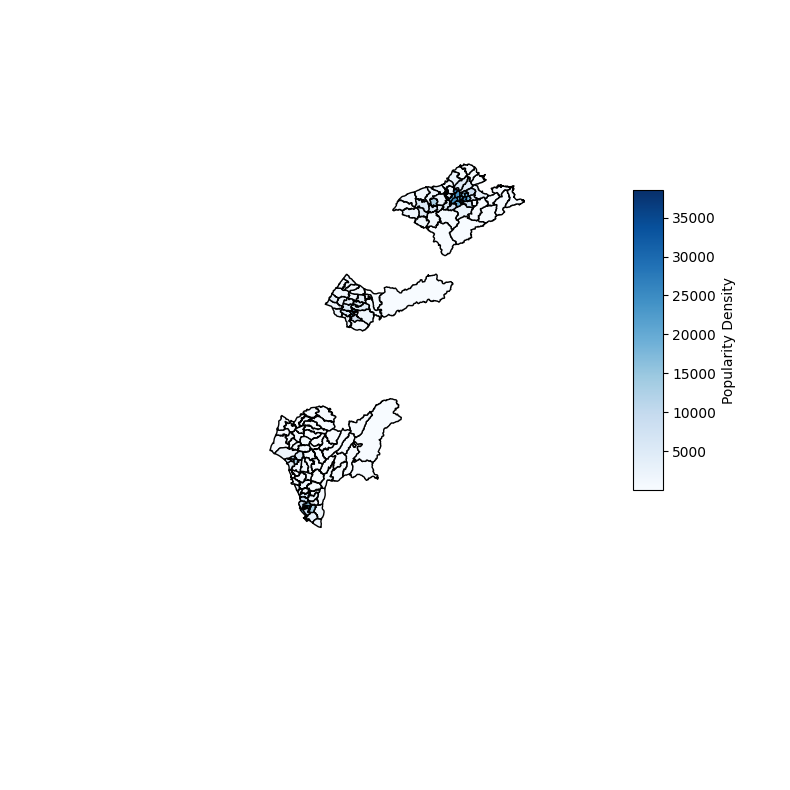

In [31]:
import cartopy.crs as ccrs
import matplotlib.colors as colors

# 台灣附近的經緯度範圍
taiwan_extent = [118, 124, 20.5, 26.5]

# 創建 colorbar
norm = colors.Normalize(vmin=six_metros_gdf['人口密度'].min(), vmax=six_metros_gdf['人口密度'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# 繪製地圖
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(taiwan_extent, crs=ccrs.PlateCarree())
ax.axis('off')

# 繪製地理數據
six_metros_gdf.plot(column='人口密度', ax=ax, legend=False, cmap='Blues', linewidth=1, edgecolor='black')

# 添加 colorbar 在地圖內部
cbar_ax = fig.add_axes([0.75, 0.4, 0.03, 0.3])  # [left, bottom, width, height]
plt.colorbar(cbar, cax=cbar_ax, orientation='vertical', label='Popularity Density')

# 保存地圖為 PNG 圖像，確保沒有邊框
plt.savefig('popularity_district.png', bbox_inches='tight', pad_inches=0, transparent=True)

# 顯示地圖
plt.show()